# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [307]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [308]:
import warnings
warnings.filterwarnings("ignore")

In [309]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [328]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [346]:
query_main=query="""
    select * 
    from agg.tidy_data_30min
    where site = 20
    AND timestamp <= '2020-03-27 00:00:00+00'::timestamp with time zone
"""
df_main = pd.read_sql_query(query_main, conn)

#agg.tidy_data_v2


In [347]:
pd.set_option('display.max_columns', None)

df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2019-04-23 15:00:00+00:00,20,2019,4,23,16,0,1,2,9.38,NaN,NaN,NaN,NaN,NaN,NaN,-27.63,-75.8800,12.71,2.03,0
1,2019-04-23 15:30:00+00:00,20,2019,4,23,16,30,1,2,10.35,NaN,NaN,NaN,NaN,NaN,NaN,-24.74,-34.7600,16.66,5.71,0
2,2019-04-23 16:00:00+00:00,20,2019,4,23,17,0,1,2,16.79,NaN,NaN,NaN,NaN,NaN,NaN,5.20,-11.6750,17.73,9.42,0
3,2019-04-23 16:30:00+00:00,20,2019,4,23,17,30,1,2,16.98,NaN,NaN,NaN,NaN,NaN,NaN,28.17,5.0250,28.62,15.78,0
4,2019-04-23 17:00:00+00:00,20,2019,4,23,18,0,1,2,11.89,NaN,NaN,NaN,NaN,NaN,NaN,53.22,11.9125,28.25,16.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17324,2020-03-26 22:00:00+00:00,20,2020,3,26,23,0,3,2,289.54,0.0,1.0,56.0,6.0,0.0,0.0,290.05,15.8175,280.23,127.95,0
17325,2020-03-26 22:30:00+00:00,20,2020,3,26,23,30,3,2,270.53,0.0,1.0,56.0,6.0,0.0,0.0,311.75,15.6900,266.59,91.20,0
17326,2020-03-26 23:00:00+00:00,20,2020,3,27,0,0,4,2,271.85,0.0,1.0,66.0,6.0,0.0,0.0,319.25,16.3025,271.09,91.98,0
17327,2020-03-26 23:30:00+00:00,20,2020,3,27,0,30,4,2,260.34,0.0,1.0,66.0,6.0,0.0,0.0,309.38,23.7375,271.55,100.01,0


In [348]:
df_main = df_main[['timestamp','net_load','month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load','weekend_or_bank_holiday','solar_radiation','sunshine_duration']]
df_main

,timestamp,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
0,2019-04-23 15:00:00+00:00,9.38,4,23,16,1,2,-27.63,0,NaN,NaN
1,2019-04-23 15:30:00+00:00,10.35,4,23,16,1,2,-24.74,0,NaN,NaN
2,2019-04-23 16:00:00+00:00,16.79,4,23,17,1,2,5.20,0,NaN,NaN
3,2019-04-23 16:30:00+00:00,16.98,4,23,17,1,2,28.17,0,NaN,NaN
4,2019-04-23 17:00:00+00:00,11.89,4,23,18,1,2,53.22,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17324,2020-03-26 22:00:00+00:00,289.54,3,26,23,3,2,290.05,0,0.0,0.0
17325,2020-03-26 22:30:00+00:00,270.53,3,26,23,3,2,311.75,0,0.0,0.0
17326,2020-03-26 23:00:00+00:00,271.85,3,27,0,4,2,319.25,0,0.0,0.0
17327,2020-03-26 23:30:00+00:00,260.34,3,27,0,4,2,309.38,0,0.0,0.0


### Convert Convert 'ts' to datetime and set as index

### Normalise net_load

In [350]:
df_main.rename(columns={'timestamp':'ts'},inplace=True)
df_main['ts'] = pd.to_datetime(df_main['ts'])
df_main.set_index('ts', inplace=True)
df_main.sort_index(inplace=True)
df_main.head()

#df_main['datetime'] = pd.to_datetime(df_main['timestamp'])
#df_main.set_index('datetime', inplace=True)

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
ts,,,,,,,,,,
2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,152.86,0,0.0,0.0
2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,204.52,0,0.0,0.0
2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,214.66,0,0.0,0.0
2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,209.72,0,0.0,0.0
2019-04-01 02:00:00+00:00,223.68,4,1,3,0,2,230.59,0,0.0,0.0


<Axes: xlabel='ts'>

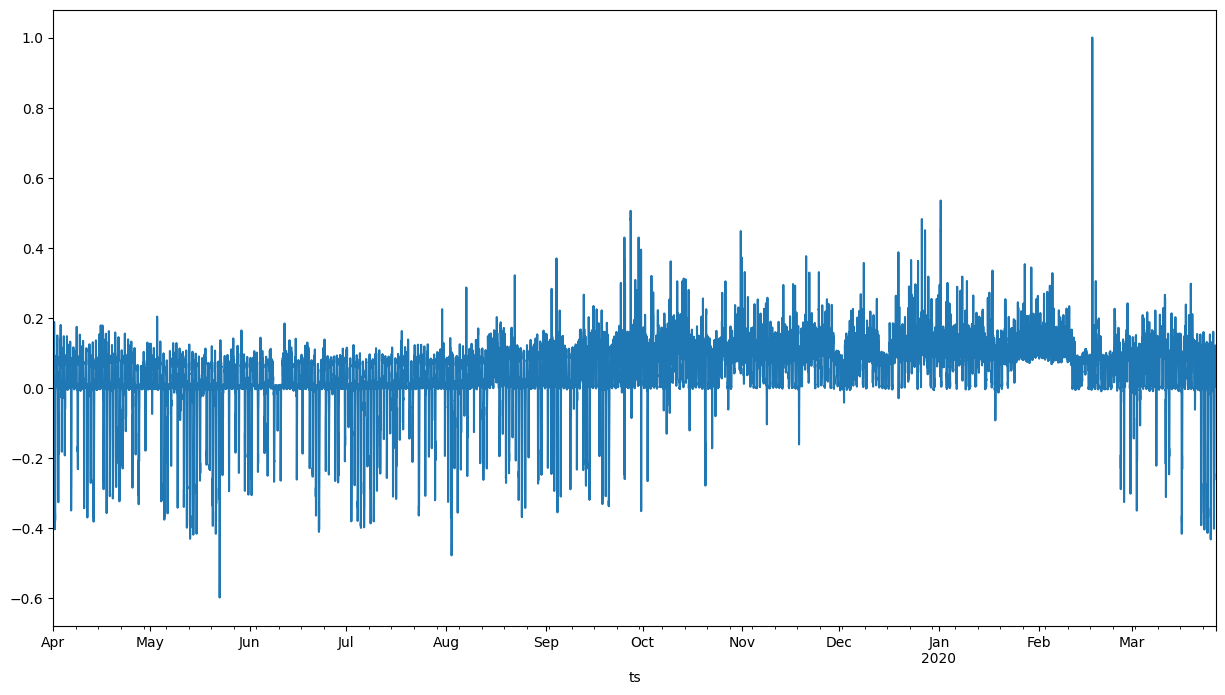

In [351]:
df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
df_main.drop('net_load',axis=1,inplace=True)

plt.figure(figsize=(15,8))
df_main['net_load_norm'].plot()

In [353]:
df_main.head()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm
ts,,,,,,,,,,
2019-04-01 00:00:00+00:00,4,1,1,0,2,152.86,0,0.0,0.0,0.066453
2019-04-01 00:30:00+00:00,4,1,1,0,2,204.52,0,0.0,0.0,0.083742
2019-04-01 01:00:00+00:00,4,1,2,0,2,214.66,0,0.0,0.0,0.064875
2019-04-01 01:30:00+00:00,4,1,2,0,2,209.72,0,0.0,0.0,0.082010
2019-04-01 02:00:00+00:00,4,1,3,0,2,230.59,0,0.0,0.0,0.074773


## Creating function for lagged net_load

In [354]:
#Creating function for lagged net_load

def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f'net_load_lag_{lag}'] = df_lagged['net_load_norm'].shift(lag)
    # Remove rows with NaN values due to shifting
    #df_lagged = df_lagged.dropna()
    return df_lagged

# Define your lags
lags = [1,2,3,4,5,48,96]


# Prepare your dataset with lagged features
df_lagged = create_lagged_features(df_main, lags)

df_lagged

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,4,1,1,0,2,152.86,0,0.0,0.0,0.066453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:30:00+00:00,4,1,1,0,2,204.52,0,0.0,0.0,0.083742,0.066453,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 01:00:00+00:00,4,1,2,0,2,214.66,0,0.0,0.0,0.064875,0.083742,0.066453,NaN,NaN,NaN,NaN,NaN
2019-04-01 01:30:00+00:00,4,1,2,0,2,209.72,0,0.0,0.0,0.082010,0.064875,0.083742,0.066453,NaN,NaN,NaN,NaN
2019-04-01 02:00:00+00:00,4,1,3,0,2,230.59,0,0.0,0.0,0.074773,0.082010,0.064875,0.083742,0.066453,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26 22:00:00+00:00,3,26,23,3,2,290.05,0,0.0,0.0,0.096789,0.095816,0.120965,0.083040,0.011279,0.005970,0.086256,0.109298
2020-03-26 22:30:00+00:00,3,26,23,3,2,311.75,0,0.0,0.0,0.090434,0.096789,0.095816,0.120965,0.083040,0.011279,0.092336,0.095469
2020-03-26 23:00:00+00:00,3,27,0,4,2,319.25,0,0.0,0.0,0.090876,0.090434,0.096789,0.095816,0.120965,0.083040,0.086627,0.090712


In [355]:
[ - 1 - lag for lag in lags]

[-2, -3, -4, -5, -6, -49, -97]

## Create initial_ts by taking the last 96 observations (48 hours) from this point backward to cover all lags

(Previously took the last 192 observations of 15 minute-intervalls (48 hours) from this point backward to cover all lags)

In [356]:
# Identify the time point for initial_ts
#Identify the start and end points for creating an initial time series to use in rolling predictions. 
#Select a subset of df_lagge to be the set of data that the rolling prediction function will use to start making predictions


end_time = df_lagged.index[-1]
start_time = end_time - pd.Timedelta(hours=24)  # 192 intervals of 15 minutes is equivalent to 48 hours / Should i not be using 36 hours?

# Make sure you don't go out of bounds
if start_time < df_lagged.index[0]:
    raise ValueError("Not enough data points for the required lags.")

# Create for rolling predictions
# We select the data between 'start_time' and 'end_time', including all necessary lags.
initial_ts = df_lagged.loc[start_time:end_time]['net_load_norm']

In [357]:
initial_ts

ts
2020-03-26 00:00:00+00:00    0.085738
2020-03-26 00:30:00+00:00    0.085330
2020-03-26 01:00:00+00:00    0.072828
2020-03-26 01:30:00+00:00    0.085654
2020-03-26 02:00:00+00:00    0.099928
2020-03-26 02:30:00+00:00    0.080001
2020-03-26 03:00:00+00:00    0.083241
2020-03-26 03:30:00+00:00    0.076013
2020-03-26 04:00:00+00:00    0.115981
2020-03-26 04:30:00+00:00    0.159936
2020-03-26 05:00:00+00:00    0.107463
2020-03-26 05:30:00+00:00    0.079229
2020-03-26 06:00:00+00:00   -0.006238
2020-03-26 06:30:00+00:00   -0.005770
2020-03-26 07:00:00+00:00   -0.011396
2020-03-26 07:30:00+00:00   -0.001842
2020-03-26 08:00:00+00:00   -0.004035
2020-03-26 08:30:00+00:00   -0.003704
2020-03-26 09:00:00+00:00   -0.007989
2020-03-26 09:30:00+00:00   -0.346912
2020-03-26 10:00:00+00:00   -0.402400
2020-03-26 10:30:00+00:00   -0.332675
2020-03-26 11:00:00+00:00   -0.244721
2020-03-26 11:30:00+00:00   -0.263026
2020-03-26 12:00:00+00:00   -0.256618
2020-03-26 12:30:00+00:00   -0.256916
2020-03-2

## Define train and test sets 

In [358]:
features = ['net_load_lag_1', 'net_load_lag_2', 'net_load_lag_3', 'net_load_lag_4', 'net_load_lag_5', 
            'net_load_lag_48', 'net_load_lag_96', 'month', 'day', 'hour', 'day_of_week', 'season', 
            'avg_net_load', 'weekend_or_bank_holiday', 'solar_radiation', 'sunshine_duration']


In [359]:
#X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
X = df_lagged[features]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-72]
test_features = X.iloc[-72:]

train_target = y.iloc[:-72]
test_target = y.iloc[-72:]

In [360]:
print(train_features.shape)
print(test_target.shape)

(17257, 16)
(72,)


### Model definition and training 

In [361]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

## Create get_input functions

#### 1. get_lags_input (get lagged values of net_load_norm)
#### 2. get_other_features_input (get other features' values at the index/timestamp we are predicting for)
#### 3. get_prediction_input (combine 1 and 2)


#### 1. get_lags_input 

In [362]:
#get_timestamp_input

def get_lags_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [- lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

#### 2. get_other_features_input
1. Define new df = df_other_features from the train_features set (which includes lagged net_load values as well) and remove lagged values
2. Add back later on lagged values cthrough the get_input function to account for their updates 

In [363]:
df_other_features = test_features.drop(test_features.columns[test_features.columns.str.startswith('net_load_lag')], axis = 1)
df_other_features.tail()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
ts,,,,,,,,,
2020-03-26 22:00:00+00:00,3,26,23,3,2,290.05,0,0.0,0.0
2020-03-26 22:30:00+00:00,3,26,23,3,2,311.75,0,0.0,0.0
2020-03-26 23:00:00+00:00,3,27,0,4,2,319.25,0,0.0,0.0
2020-03-26 23:30:00+00:00,3,27,0,4,2,309.38,0,0.0,0.0
2020-03-27 00:00:00+00:00,3,27,1,4,2,357.93,0,0.0,0.0


In [364]:
def get_other_features_input(other_features, index):
    return other_features.loc[index].values.reshape(1, -1)

#### 3. get_prediction_input (combine 1 and 2)

In [365]:
def get_prediction_input(ts, other_features, lags):
    input_lags = get_lags_input(ts, lags)
    index = ts.index[-1] + pd.Timedelta(minutes=30)
    
    input_features = get_other_features_input(other_features, index)
    
    return np.concatenate((input_lags, input_features), axis = 1)

### Rolling origin prediction

Create a function that performs sequential predictions over a specified number of steps, using each prediction as input for the next

In [366]:
def rolling_window_predictions(model, full_series, other_features, n, lags):
    
    initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for i in range(0, n): # Iterate over the test set to predict one step ahead each time
        
        input_features = get_prediction_input(initial_ts, other_features, lags) # Get the input features for the current prediction

        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        new_index = initial_ts.index[-1] + pd.Timedelta(minutes=30)

        print("new_index: ", new_index)
        
        initial_ts.loc[new_index] = pred
    
    return predictions


In [ ]:
# Check for missing values

#df_other_features

#check df_other_features between Timestamp('2020-03-28 23:00:00+0000', tz='UTC') and Timestamp('2020-03-29 01:00:00+0000', tz='UTC')
#df_other_features.loc['2020-03-28 23:00:00+00:00':'2020-03-29 02:00:00+00:00']

In [367]:
prediction_test=rolling_window_predictions(rf, train_target, df_other_features, 72, lags)
#len(prediction_test)

new_index:  2020-03-25 12:30:00+00:00
new_index:  2020-03-25 13:00:00+00:00
new_index:  2020-03-25 13:30:00+00:00
new_index:  2020-03-25 14:00:00+00:00
new_index:  2020-03-25 14:30:00+00:00
new_index:  2020-03-25 15:00:00+00:00
new_index:  2020-03-25 15:30:00+00:00
new_index:  2020-03-25 16:00:00+00:00
new_index:  2020-03-25 16:30:00+00:00
new_index:  2020-03-25 17:00:00+00:00
new_index:  2020-03-25 17:30:00+00:00
new_index:  2020-03-25 18:00:00+00:00
new_index:  2020-03-25 18:30:00+00:00
new_index:  2020-03-25 19:00:00+00:00
new_index:  2020-03-25 19:30:00+00:00
new_index:  2020-03-25 20:00:00+00:00
new_index:  2020-03-25 20:30:00+00:00
new_index:  2020-03-25 21:00:00+00:00
new_index:  2020-03-25 21:30:00+00:00
new_index:  2020-03-25 22:00:00+00:00
new_index:  2020-03-25 22:30:00+00:00
new_index:  2020-03-25 23:00:00+00:00
new_index:  2020-03-25 23:30:00+00:00
new_index:  2020-03-26 00:00:00+00:00
new_index:  2020-03-26 00:30:00+00:00
new_index:  2020-03-26 01:00:00+00:00
new_index:  

In [369]:
####### with n = 36 
#predicted_values = rolling_window_predictions(rf, train_target, other_features = df_other_features, n = 36, lags=[1,2,3,4,5,48,96])

#len(predicted_values)
# predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

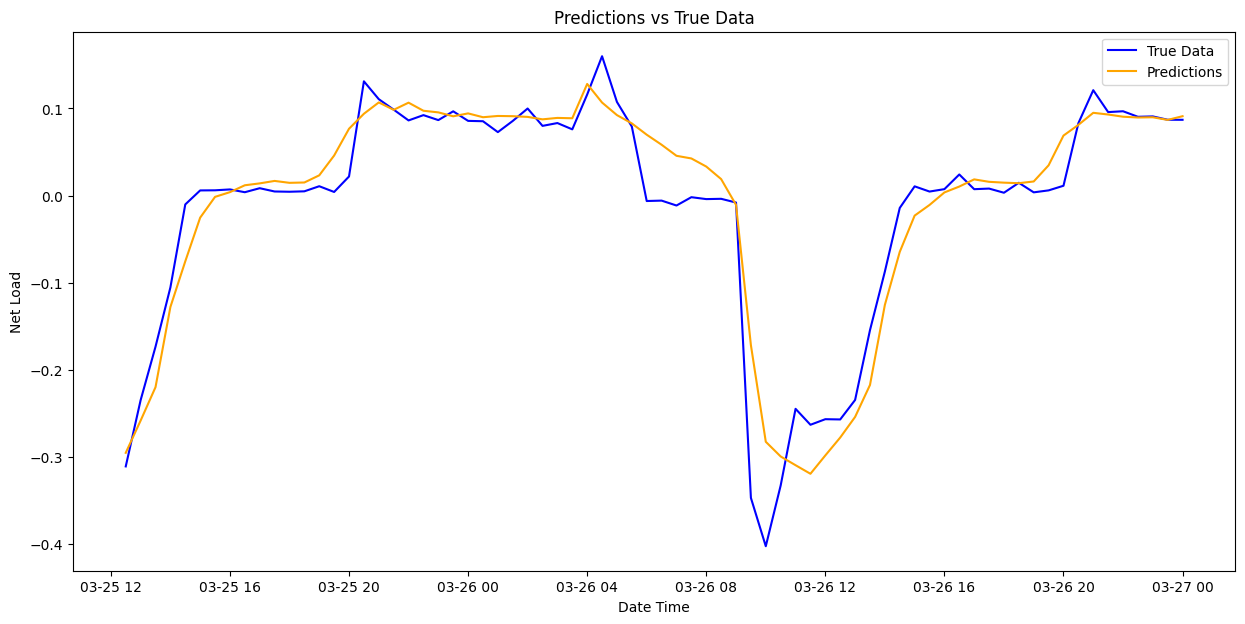

In [372]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(test_target.index, prediction_test, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()


In [ ]:
print(len(predicted_values))
#predicted_values

36


[-0.3590415016129301,
 -0.31661344832773386,
 -0.25000989486703756,
 -0.23705485393371098,
 -0.15196910715539286,
 -0.1331641989001989,
 -0.10167774824917679,
 -0.08148984606127456,
 -0.07434759063330487,
 -0.0768912066054923,
 -0.07195701081415368,
 -0.07311036453893596,
 -0.07350963579535005,
 -0.08041454812883383,
 -0.07747333233047515,
 -0.07802256430827857,
 -0.07770599542028112,
 -0.07767574253288538,
 -0.07387501044643902,
 -0.07456263684835111,
 -0.07547303147303144,
 -0.06876210533353387,
 -0.07446017817446383,
 -0.07484871884871878,
 -0.15546785003927854,
 -0.021711511140082566,
 -0.09045305788162926,
 -0.16908886994601274,
 -0.016471477042905615,
 -0.051555499841214145,
 -0.1797414297414296,
 0.008624914339200058,
 0.043052492473048154,
 0.10404583061725921,
 0.10613359009543873,
 0.1349982306473449]

## Implement the rolling window predictions with the new function

## Re-define train + test to include 30 days for test

In [373]:
X = df_lagged[features]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-2160]
train_target = y.iloc[:-2160]

test_target = y.iloc[-2160:]
test_features = X.iloc[-2160:]


In [374]:
df_other_features_2 = test_features.drop(test_features.columns[test_features.columns.str.startswith('net_load_lag')], axis = 1)
df_other_features_2.tail()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
ts,,,,,,,,,
2020-03-26 22:00:00+00:00,3,26,23,3,2,290.05,0,0.0,0.0
2020-03-26 22:30:00+00:00,3,26,23,3,2,311.75,0,0.0,0.0
2020-03-26 23:00:00+00:00,3,27,0,4,2,319.25,0,0.0,0.0
2020-03-26 23:30:00+00:00,3,27,0,4,2,309.38,0,0.0,0.0
2020-03-27 00:00:00+00:00,3,27,1,4,2,357.93,0,0.0,0.0


In [375]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

In [376]:
def nested_prediction_model(model, input_ts, other_features, true_data, n_steps, n_days, lags=[1,2,3,4,5,48,96] ):
    full_predictions = []
    ts = input_ts.copy()
# Iterate over each day in the test data
    for day in range(0, n_days):
        
        # Make predictions for the current day
        pred_day = rolling_window_predictions(model, ts, other_features, n_steps, lags)

        # Append the day's predictions to the full predictions
        full_predictions.extend(pred_day)

        # update true values
        true_values = true_data[day*n_steps : (day+1)*n_steps]

        ts = pd.concat([ts, pd.Series(true_values)]) # Update ts by appending the predicted values

    return full_predictions



In [377]:
full_predictions=nested_prediction_model(rf, train_target, df_other_features_2, test_target, 72, 30, lags=[1,2,3,4,5,48,96])
#full_predictions

new_index:  2020-02-11 00:30:00+00:00
new_index:  2020-02-11 01:00:00+00:00
new_index:  2020-02-11 01:30:00+00:00
new_index:  2020-02-11 02:00:00+00:00
new_index:  2020-02-11 02:30:00+00:00
new_index:  2020-02-11 03:00:00+00:00
new_index:  2020-02-11 03:30:00+00:00
new_index:  2020-02-11 04:00:00+00:00
new_index:  2020-02-11 04:30:00+00:00
new_index:  2020-02-11 05:00:00+00:00
new_index:  2020-02-11 05:30:00+00:00
new_index:  2020-02-11 06:00:00+00:00
new_index:  2020-02-11 06:30:00+00:00
new_index:  2020-02-11 07:00:00+00:00
new_index:  2020-02-11 07:30:00+00:00
new_index:  2020-02-11 08:00:00+00:00
new_index:  2020-02-11 08:30:00+00:00
new_index:  2020-02-11 09:00:00+00:00
new_index:  2020-02-11 09:30:00+00:00
new_index:  2020-02-11 10:00:00+00:00
new_index:  2020-02-11 10:30:00+00:00
new_index:  2020-02-11 11:00:00+00:00
new_index:  2020-02-11 11:30:00+00:00
new_index:  2020-02-11 12:00:00+00:00
new_index:  2020-02-11 12:30:00+00:00
new_index:  2020-02-11 13:00:00+00:00
new_index:  

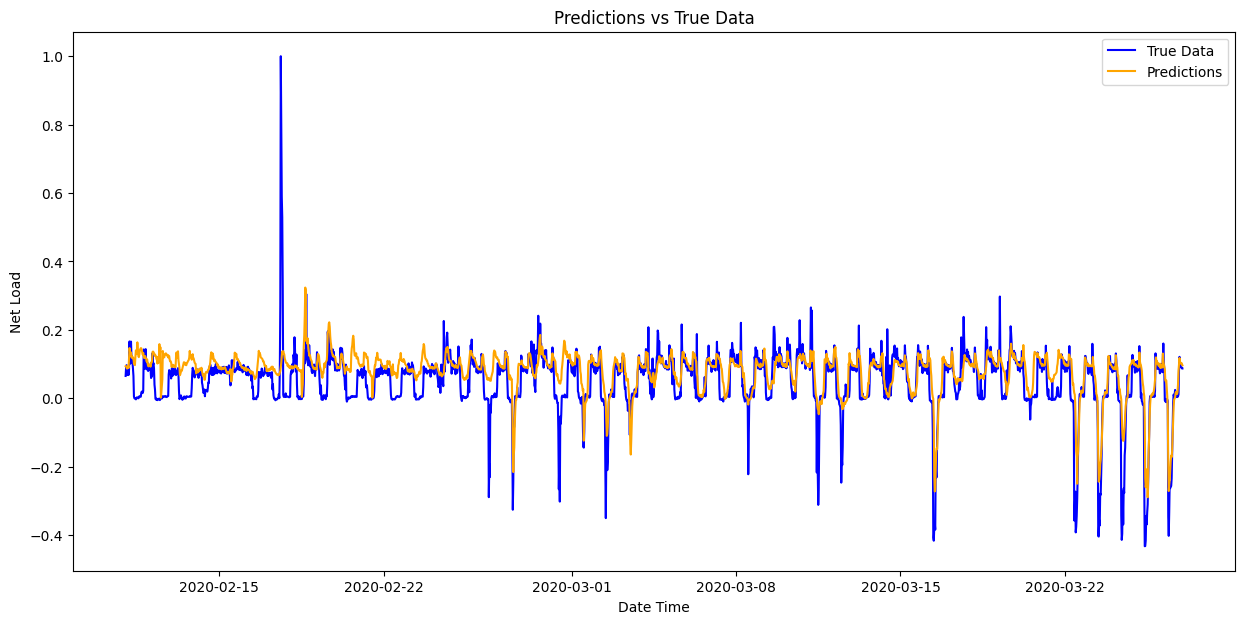

In [378]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(test_target.index, full_predictions, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Your plot code here

# Save the plot as a PNG image file
plt.savefig('plot.png')


### . 

### . 

### . 

### . 

In [ ]:
len(full_predictions)

2160

Convert full_predictions into a Pandas Series with the same index as the test_target

In [ ]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])



In [ ]:
print(len(test_target))
print(len(train_target))

2160
14812


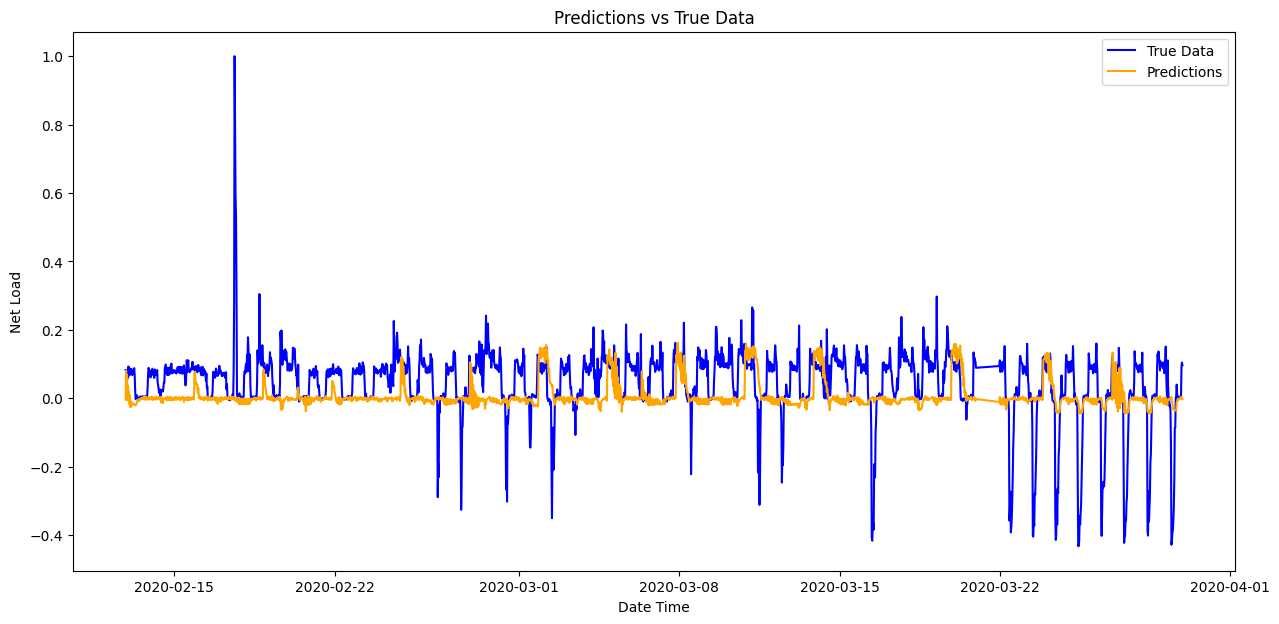

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()

In [ ]:
train_target

ts
2019-04-03 00:00:00+00:00    0.090284
2019-04-03 00:30:00+00:00    0.062582
2019-04-03 01:00:00+00:00    0.067512
2019-04-03 01:30:00+00:00    0.065470
2019-04-03 02:00:00+00:00    0.075509
                               ...   
2020-02-12 18:30:00+00:00    0.003363
2020-02-12 19:00:00+00:00    0.004657
2020-02-12 19:30:00+00:00    0.006057
2020-02-12 20:00:00+00:00    0.006438
2020-02-12 20:30:00+00:00    0.068863
Name: net_load_norm, Length: 14812, dtype: float64

## .
## . 
## Iteration where model is updated the prediction point every 30 minutes 
### (as opposed to the 24 hours daily loop)

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, update_interval, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the number of updates based on the update interval
    n_updates = len(true_data) // update_interval

    for update in range(n_updates):
        # Generate predictions for the next 36 hours
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        
        # Store the first prediction (next 30 minutes) and discard the rest
        full_predictions.append(pred_day[0])

        # Determine the index for updating ts with true values or predictions
        update_idx = min((update + 1) * update_interval, len(true_data))

        # Update ts with the true value if available, otherwise use the predicted value
        next_values = true_data[update * update_interval : update_idx]
        ts = pd.concat([ts, next_values]) if not next_values.empty else pd.concat([ts, pd.Series(pred_day[:update_interval])])

        # Ensure ts is the correct length for the next prediction
        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, update_interval, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the total number of updates
    n_updates = (len(true_data) - n_steps) // update_interval + 1

    for update in range(n_updates):
        if (update + 1) * update_interval + n_steps > len(true_data):
            break  # Break if the next slice would be out of bounds

        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        full_predictions.append(pred_day[0])

        update_idx = (update + 1) * update_interval
        next_values = true_data[update * update_interval : min(update_idx, len(true_data))]

        if not next_values.empty:
            ts = pd.concat([ts, next_values])
        else:
            ts = pd.concat([ts, pd.Series(pred_day[0])])

        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
full_predictions = nested_prediction_model_30min(rf, train_target, test_target, 72, 1, lags=[1,2,3,4,5,48,96])


TypeError: rolling_window_predictions() missing 1 required positional argument: 'lags'

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the number of 30-min intervals in the test period
    n_intervals = len(true_data) - n_steps + 1

    for interval in range(n_intervals):
        # Generate predictions for the next 36 hours
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        
        # Store the first prediction (next 30 minutes) and discard the rest
        full_predictions.append(pred_day[0])

        # Update ts with the true value if available, otherwise use the predicted value
        if interval < n_intervals - 1:
            true_value = true_data[interval : interval + 1].values
            ts = pd.concat([ts, pd.Series(true_value)])
        else:
            ts = pd.concat([ts, pd.Series(pred_day[0])])

        # Ensure ts is the correct length for the next prediction
        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
#def nested_prediction_model_30min(model, input_ts, true_data, n_steps, lags):

full_predictions=nested_prediction_model_30min(rf, train_target, test_target, 72, lags=[1,2,3,4,5,48,96])

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:

IndexError: positional indexers are out-of-bounds

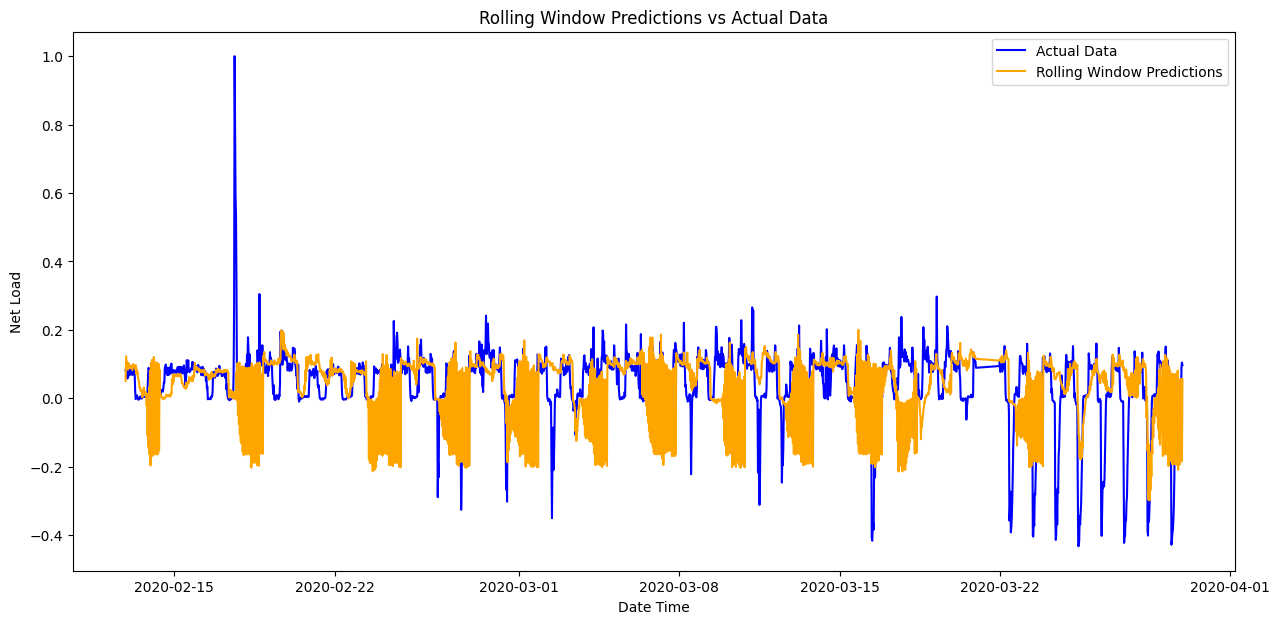

In [ ]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])
# Plot the full predictions against the actual data
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='Actual Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Rolling Window Predictions', color='orange')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.title('Rolling Window Predictions vs Actual Data')
plt.show()
